In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [3]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


## Predicting house prices

1. Import the numpy package using the alias np.
2. Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
3. Print explanatory_data.

In [4]:
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(11)})

# Print it
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


1. Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.
2. Print the predictions.

**HINT!**

Use the .predict() method to calculate predictions.


In [5]:
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


Create a DataFrame of predictions named prediction_data. Start with explanatory_data, then add an extra column, price_twd_msq, containing the predictions you created in the previous step.

**HINT!**

Use the .assign()

In [6]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


## Visualizing predictions

1. Create a new figure to plot multiple layers.
2. Extend the plotting code to add points for the predictions in prediction_data. Color the points red.
3. Display the layered plot.

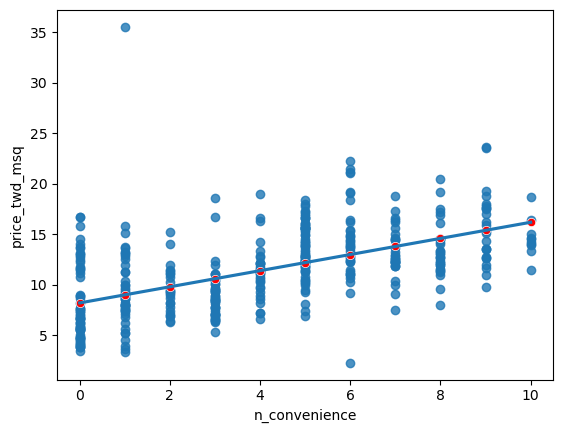

In [7]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience", y="price_twd_msq",data=prediction_data, color="red", alpha=1)

# Show the layered plot
plt.show()

## The limits of prediction

1. Create some impossible explanatory data. Define a DataFrame impossible with one column, n_convenience, set to -1 in the first row, and 2.5 in the second row.
2. Try predicting with mdl_price_vs_conv


In [8]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

# Use mdl_price_vs_conv to predict with impossible, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(impossible)
price_twd_msq

0     7.426158
1    10.219437
dtype: float64

## Extracting model elements

1. Print the parameters of mdl_price_vs_conv.
2. Print the fitted values of mdl_price_vs_conv.
3. Print the residuals of mdl_price_vs_conv.
4. Print a summary of mdl_price_vs_conv.


In [9]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           3.41e-37
Time:                        21:25:02   Log-Likelihood:                -1091.1
No. Observations:                 414   

## Manually predicting house prices

1. Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.
2. Get the intercept, which is the first element of coeffs, assigning to intercept.
3. Get the slope, which is the second element of coeffs, assigning to slope.
4. Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.
5. Run the code to compare your manually calculated predictions to the results from .predict().

In [24]:
# Get the coefficients of mdl_price_vs_conv
coeffs =mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

   n_convenience
0       8.224237
1       9.022317
2       9.820397
3      10.618477
4      11.416556
5      12.214636
6      13.012716
7      13.810795
8      14.608875
9      15.406955
   n_convenience  predictions_auto
0       8.224237          8.224237
1       9.022317          9.022317
2       9.820397          9.820397
3      10.618477         10.618477
4      11.416556         11.416556
5      12.214636         12.214636
6      13.012716         13.012716
7      13.810795         13.810795
8      14.608875         14.608875
9      15.406955         15.406955


## Plotting consecutive portfolio returns

1. Create a new figure, fig, to enable plot layering.
2. Generate a line at y equals x. This has been done for you.
3. Using sp500_yearly_returns, draw a scatter plot of return_2019 vs. return_2018 with a linear regression trend line, without a standard error ribbon.
4. Set the axes so that the distances along the x and y axes look the same.

In [17]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')
sp500_yearly_returns

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762
...,...,...,...
488,HFC,0.019944,0.019407
489,FTI,-0.363155,0.120931
490,UAA,0.224532,0.222411
491,UA,0.213964,0.186147


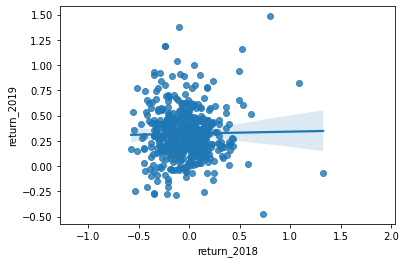

In [23]:
# Create a new figure, fig
fig = plt.figure

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y="return_2019", data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

## Modeling consecutive returns

1. Run a linear regression on return_2019 versus return_2018 using sp500_yearly_returns and fit the model. Assign to mdl_returns.
2. Print the parameters of the model.


In [24]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ls("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64


1. Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.
2. Use mdl_returns to predict with explanatory_data in a print() call.

In [25]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({return_2018: [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming the explanatory variable

1. Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.
2. Run a linear regression of price_twd_msq versus the square root of dist_to_mrt_m using taiwan_real_estate.
3. Print the parameters.

In [25]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

1. Create a DataFrame of predictions named prediction_data by adding a column of predictions called price_twd_msq to explanatory_data. Predict using mdl_price_vs_dist and explanatory_data.
2. Print the predictions.

In [27]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the parameters
prediction_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.0,0,16.709799
1,10.0,100,14.881370
2,20.0,400,13.052942
3,30.0,900,11.224513
4,40.0,1600,9.396085
5,50.0,2500,7.567656
6,60.0,3600,5.739227
7,70.0,4900,3.910799
8,80.0,6400,2.082370


Add a layer to your plot containing points from prediction_data, colored "red".


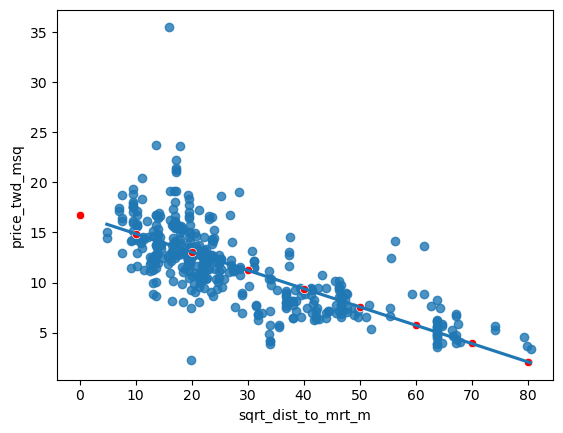

In [28]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
prediction_data

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color="red")
plt.show()

## Transforming the response variable too

1. Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
2. Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.
3. Create a regression plot using the transformed variables

In [31]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710000,790253,135


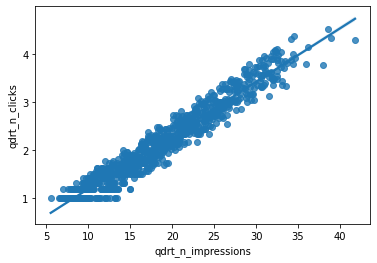

In [33]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25
plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion)
plt.show()

Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.


In [34]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

Complete the code to create the prediction data.


In [35]:
# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


## Back transformation

Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.


In [36]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


Edit the plot to add a layer of points from prediction_data, colored "red".


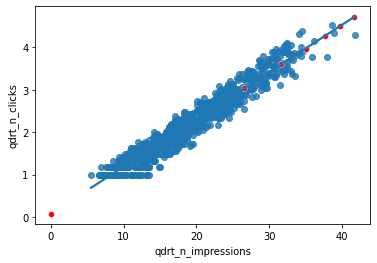

In [37]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()